#**Laporan Proyek Machine Learning - Fawzan Ibnu Fajar**

# **Business Understanding**

Business Understanding berisi mengenai pemaparan tema melalui sudut pandang objektif bisnis meliputi Latar Belakang Masalah, Identifikasi Masalah, Metode atau Pendekatan Penyelesaian Masalah, Tujuan Teknis dan Kriteria Kesuksesan. Setelah seluruh pemaparan tersebut disampaikan terdapat Timeline riset guna memberi tenggat waktu dalam mencapai hasil akhir riset.

#**Latar Belakang**

Diskriminasi gender dalam berbagai hal di kehidupan bermasyarakat
menimbulkan perbedaan capaian pembangunan antara laki-laki dan
perempuan. Jepang memiliki ekonomi terbesar ketiga di dunia berdasarkan produk domestik bruto (PDB). Meskipun demikian, ada kesenjangan upah gender yang signifikan di Jepang. Menurut Organisation for Economic Co-operation and Development (OECD) atau Organisasi untuk Kerja Sama dan Pembangunan Ekonomi, perempuan yang bekerja di Jepang memperoleh penghasilan rata-rata 22% lebih rendah daripada laki-laki pada tahun 2020. Lalu, Laporan Kesenjangan Gender Global Forum Ekonomi Dunia 2021 menempatkan Jepang di peringkat 120 dari 156 negara. Tujuan penelitian ini, yaitu untuk memprediksi upaya apa saja yang dapat dilakukan untuk menurunkan kesenjangan penghasilan perempuan di Jepang menggunakan model analisis forecasting.

# **Identifikasi Masalah**

Berikut merupakan identifikasi masalah dalam awal rancangan pembuatan riset Gender Equality In Japan:

1. Kesenjangan penghasilan sebesar 22% yang dialami pekerja perempuan di Jepang
2. Jepang menduduki peringkat 120 dari total 156 negara dengan kesenjangan gaji gender terbesar di dunia dari data the World Economic Forum’s pada tahun 2021.
3. Pengaruh tenaga kerja perempuan dinilai berhubungan erat dengan kesenjangan penghasilan yang terjadi di Jepang, sehingga membutuhkan persentase peningkatkan jumlah perempuan yang masuk ke dunia kerja.


Rumusan masalah diatas dapat diolah kembali untuk digunakan dalam menemukan hasil riset apa yang ingin diketahui. Berikut adalah wisdom yang ingin dicapai saat melakukan riset Gender Equality In Jepang:

1. Mengetahui persentase tingkat kesenjangan pendapatan gender perempuan di Jepang menurut OECD
2. Mengetahui cara penurunan tingkat kesenjangan pendapatan gender di Jepang
3. Mengetahui berapa persentasi dibutuhkannya peningkatkan jumlah perempuan yang masuk ke dunia kerja sehingga kesenjangan penghasilan gender di Jepang dapat menurun
4. Sehingga selanjutnya dapat merancang suatu solusi yang tepat guna memecahkan permasalahan gender pada 3 sektor diatas.


# **Metode/ Pendekatan Penyelesaian Masalah**

Dalam riset Gender Equality In Japan saya menggunakan metode Regresi Linier. Metode ini akan digunakan untuk menganalisis berapa rentang 'Gap' gaji berdasarkan gender di Jepang serta prediksi apa yang harus ditingkatkan untuk meminimalisir 'Gap' Gaji tersebut.

Saya akan menggunakan data dari https://data.oecd.org sebagai acuan awal informasi riset kedepannya.

# **Data Understanding**

Pada mini riset ini, saya menggunakan dataset yang bersumber dari https://data.oecd.org. Berikut beberapa data yang akan saya gunakan :

* Location             : Negara Asal
* Indicator            : Alat Ukur Penelitian
* Subject              : Bagian Penelitian
* Measure              : Ukuran Penelitian
* Frequency            : Kekerapan Jumlah 
* Time                 : Tahun Pemrosesan Data
* Value                : Persentase Gap Gaji berdasarkan Gender
* JAP/JPN              : Data Gender Equality di Negara Jepang
* Average Wage         : Rata-rata Gaji
* Female Labour        : Jumlah Ketenagakerjaan Perempuan
* Total Labour         : Jumlah Ketenagakerjaan
* Female Labour Ratio  : Rasio Ketenagakerjaan Perempuan

Jumlah row sebanyak 1245 baris

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 
     |████████████████████████████████| 16.6 MB 137 kB/s 
     |████████████████████████████████| 7.8 MB 21.7 MB/s 


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go

%matplotlib inline

In [8]:
url = 'https://raw.githubusercontent.com/FawzanIF/japan_wagegap/main/gap.csv'
df = pd.read_csv(url)
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.582734,NaN
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.754717,NaN
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.390805,NaN
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.791667,NaN
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.000000,NaN
...,...,...,...,...,...,...,...,...
1239,BRA,WAGEGAP,EMPLOYEE,PC,A,2017,13.333333,NaN
1240,BRA,WAGEGAP,EMPLOYEE,PC,A,2018,10.666667,NaN
1241,BRA,WAGEGAP,EMPLOYEE,PC,A,2019,6.666667,NaN
1242,BRA,WAGEGAP,EMPLOYEE,PC,A,2020,6.250000,NaN


In [9]:
df = df.drop('Flag Codes', axis=1)
df.columns= df.columns.str.lower()
df.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.582734
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.754717
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.390805
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.791667
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   1244 non-null   object 
 1   indicator  1244 non-null   object 
 2   subject    1244 non-null   object 
 3   measure    1244 non-null   object 
 4   frequency  1244 non-null   object 
 5   time       1244 non-null   int64  
 6   value      1244 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 68.2+ KB


In [11]:
df['value'] = df['value'].astype(str)

In [12]:
df['value']=df['value'].str.replace(".", "")
df['value'] = df['value'].str[:2]
df['value']=df['value'].astype(float)
df

<ipython-input-12-d979f2bad6dd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['value']=df['value'].str.replace(".", "")


,location,indicator,subject,measure,frequency,time,value
0,AUS,WAGEGAP,EMPLOYEE,PC,A,1975,21.0
1,AUS,WAGEGAP,EMPLOYEE,PC,A,1976,20.0
2,AUS,WAGEGAP,EMPLOYEE,PC,A,1977,18.0
3,AUS,WAGEGAP,EMPLOYEE,PC,A,1978,19.0
4,AUS,WAGEGAP,EMPLOYEE,PC,A,1979,20.0
...,...,...,...,...,...,...,...
1239,BRA,WAGEGAP,EMPLOYEE,PC,A,2017,13.0
1240,BRA,WAGEGAP,EMPLOYEE,PC,A,2018,10.0
1241,BRA,WAGEGAP,EMPLOYEE,PC,A,2019,66.0
1242,BRA,WAGEGAP,EMPLOYEE,PC,A,2020,62.0


In [13]:
df['value'].describe()

count    1244.000000
mean       31.895498
std        20.899838
min        -8.000000
25%        17.000000
50%        26.000000
75%        40.000000
max        99.000000
Name: value, dtype: float64

In [14]:
df=df.drop(['indicator','measure','frequency'],axis=1)

**Menampilkan Kesenjangan Gender dari 2000 sampai 2020**

In [15]:
df=df.sort_values(by=['time'])

In [16]:
df1=df[df['time']>=2000]

In [17]:
value_revise= lambda x : x/10 if (x > 42 ) else x

In [18]:
df1['value_new']=df1['value'].apply(value_revise)

<ipython-input-18-88eead9ff1a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['value_new']=df1['value'].apply(value_revise)


In [19]:
df1.describe()

,time,value,value_new
count,1047.000000,1047.000000,1047.000000
mean,2011.066858,32.429799,18.347851
std,5.520804,21.861737,10.661355
min,2000.000000,-8.000000,-8.000000
25%,2006.000000,16.000000,9.800000
50%,2011.000000,26.000000,16.000000
75%,2016.000000,41.000000,27.000000
max,2021.000000,99.000000,42.000000


In [20]:
df1 = df1.drop('value', axis=1)

In [21]:
import numpy as np
  
# converting 'Field_2' from float to int
df1['value_new'] = df1['value_new'].apply(np.int64)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 679 to 1243
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   1047 non-null   object
 1   subject    1047 non-null   object
 2   time       1047 non-null   int64 
 3   value_new  1047 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 40.9+ KB


In [23]:
df1

,location,subject,time,value_new
679,NOR,EMPLOYEE,2000,9
137,CAN,EMPLOYEE,2000,23
995,USA,EMPLOYEE,2000,23
930,GBR,EMPLOYEE,2000,26
388,HUN,EMPLOYEE,2000,14
...,...,...,...,...
580,MEX,EMPLOYEE,2021,12
658,NZL,EMPLOYEE,2021,6
1016,USA,EMPLOYEE,2021,16
1233,ARG,EMPLOYEE,2021,6


In [27]:
fig = px.choropleth(df1,locations='location',color='value_new',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(-10,45),title='OECD Kesenjangan Gender',height=700,animation_frame ='time'
    )
fig.show()

**Selanjutnya mari fokus ke negara Jepang**

In [28]:
df_jap=df1[df1['location']=='JPN']

In [29]:
df_jap.head()

,location,subject,time,value_new
492,JPN,EMPLOYEE,2000,33
493,JPN,EMPLOYEE,2001,33
494,JPN,EMPLOYEE,2002,32
495,JPN,EMPLOYEE,2003,31
496,JPN,EMPLOYEE,2004,31


Disini ditambahkan beberapa kolom yaitu : 'average annual wage','female labour' dan 'total labour' untuk mencari faktor yang dapat menaikkan/improve 'Gap'

source : OECD data

In [31]:
df_jap['ave_wage']=[38364,37982,37228,37254,37233,37882,38879,38849,38742,38448,37950,38085,38699,38057,38103,37438,
                    37264,37810,37972,38461,39041,38514]

<ipython-input-31-3a43ebd0eef8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df_jap['female_labour']=[27525,27603,27335,27326,27320,27369,27497,27612,27679,27707,27820,27828,27700,27693,28095,
                       28317,28517,28949,29435,30242,30722,30633]

<ipython-input-32-de039040ea6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_jap['total_labour']=[67662,67518,66890,66663,66632,66420,66505,66638,66843,66740,66500,66317,65955,65651,65927,
                       66087,66250,66785,67323,68491,69121,69022]

<ipython-input-33-90dca86a2487>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df_jap['female_labour_ratio']=df_jap['female_labour']/df_jap['total_labour']

<ipython-input-34-fba33879acce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_jap

,location,subject,time,value_new,ave_wage,female_labour,total_labour,female_labour_ratio
492,JPN,EMPLOYEE,2000,33,38364,27525,67662,0.406801
493,JPN,EMPLOYEE,2001,33,37982,27603,67518,0.408824
494,JPN,EMPLOYEE,2002,32,37228,27335,66890,0.408656
495,JPN,EMPLOYEE,2003,31,37254,27326,66663,0.409913
496,JPN,EMPLOYEE,2004,31,37233,27320,66632,0.410013
497,JPN,EMPLOYEE,2005,32,37882,27369,66420,0.412060
498,JPN,EMPLOYEE,2006,32,38879,27497,66505,0.413458
499,JPN,EMPLOYEE,2007,31,38849,27612,66638,0.414358
500,JPN,EMPLOYEE,2008,30,38742,27679,66843,0.414090
501,JPN,EMPLOYEE,2009,28,38448,27707,66740,0.415148


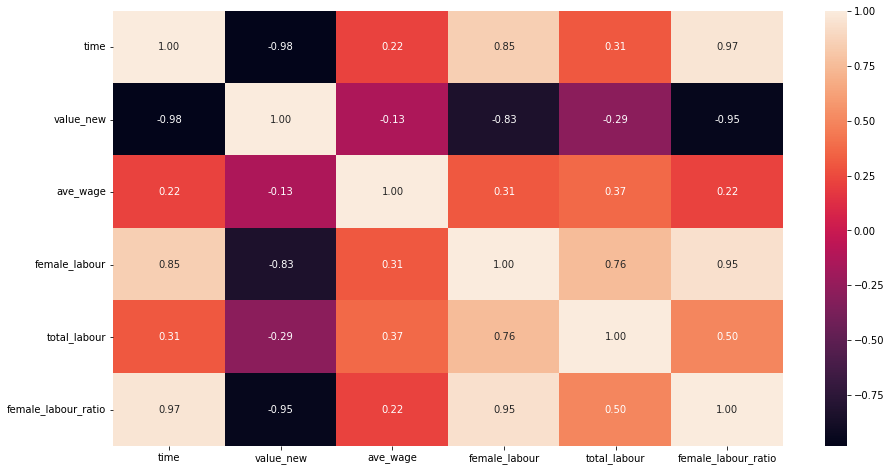

In [37]:
plt.figure(figsize = (15,8))
sns.heatmap(df_jap.corr(), annot=True,fmt='.2f')

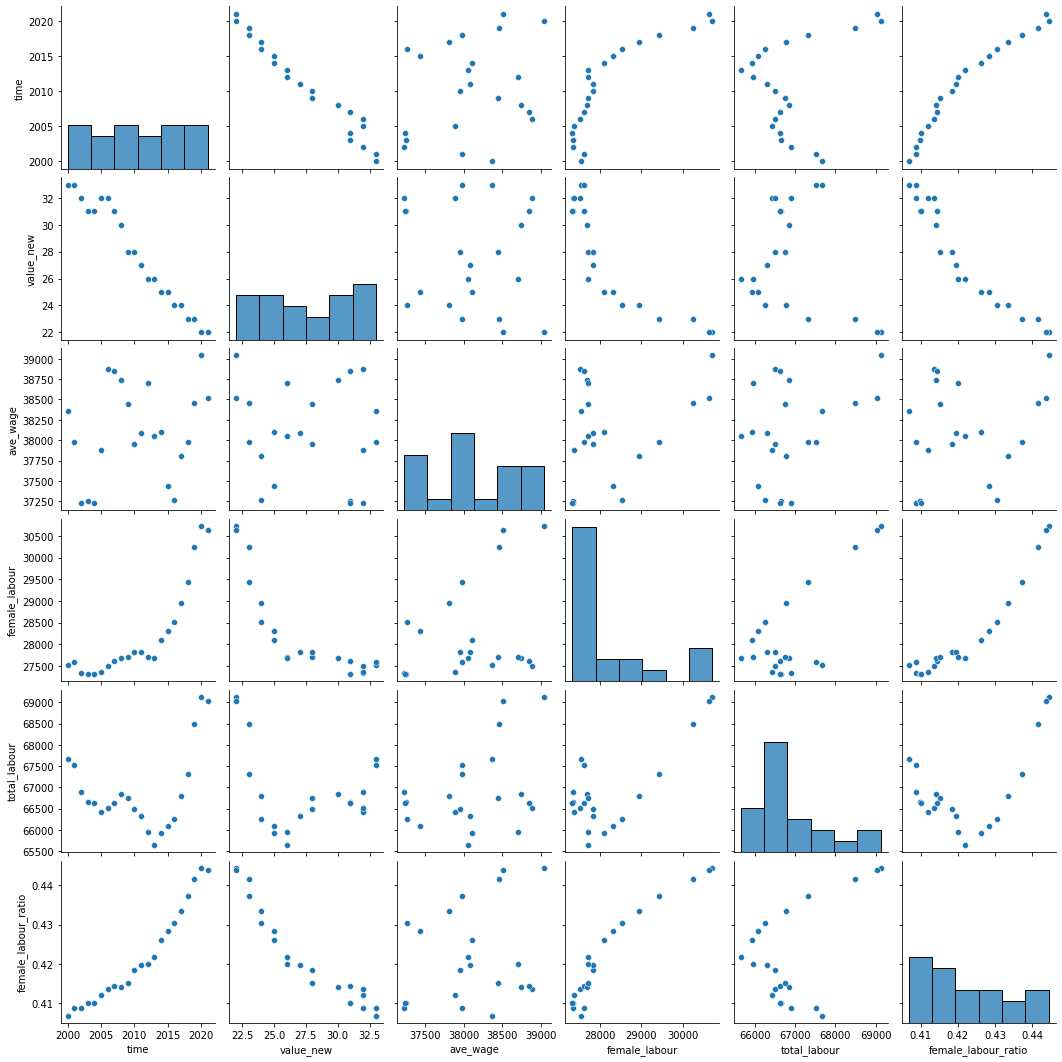

In [38]:
sns.pairplot(df_jap)

Salah satu faktor terpenting adalah bagaimana kita dapat meningkatkan jumlah perempuan yang masuk ke dunia kerja.

Sebagai langkah selanjutnya, saya mencoba memodelkan single regression analysis antara 'female labour ratio' dan 'value'.

In [39]:
x = df_jap[['female_labour_ratio']]
y = df_jap[['value_new']]

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

In [42]:
print('w1: %.3f' %model_lr.coef_)
print('w2: %.3f' %model_lr.intercept_)
print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
print('R^2： ', model_lr.score(x, y))

w1: -299.760
w2: 154.063
y= -299.760x + 154.063
R^2：  0.9042708056782938


Jika kita ingin mengurangi Kesenjangan Upah Gender di Jepang menjadi rata-rata OECD 11%, berapa banyak perempuan yang harus bekerja di Jepang?

In [43]:
x=(11-154.063)/-299.760
x

0.48013626708896695

# **Kesimpulan**

Kita harus menaikkan 'female_labor_ratio' menjadi 48% untuk mengurangi Kesenjangan Upah Gender di Jepang menjadi Rata-Rata OECD 11%. Artinya kita harus meningkatkan 4% dalam 'female_labor_ratio'. Menurut deret waktu female_labor_ratio antara tahun 2000 hingga 2020, butuh waktu 20 tahun untuk meningkatkan 4% !

Female labour harus ditambah sebanyak kurang lebih 3200an pekerja wanita